In [ ]:
# !pip install seaborn

In [ ]:
# !pip install pandas_profiling

In [ ]:
# !pip install sklearn

In [1]:
import math
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

In [3]:
beers_df = pd.read_csv( 'beer_reviews.csv' )
beers_df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [4]:
beers_df.shape

(1586614, 13)

In [5]:
beers_df[ 'review_time' ] = pd.to_datetime( beers_df[ 'review_time' ], unit = 's' )

In [6]:
beers_df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,2009-02-16 20:57:03,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,2009-03-01 13:44:57,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,2009-03-01 14:10:04,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,2009-02-15 19:12:25,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,2010-12-30 18:53:26,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [7]:
beers_df.dtypes

brewery_id                     int64
brewery_name                  object
review_time           datetime64[ns]
review_overall               float64
review_aroma                 float64
review_appearance            float64
review_profilename            object
beer_style                    object
review_palate                float64
review_taste                 float64
beer_name                     object
beer_abv                     float64
beer_beerid                    int64
dtype: object

In [8]:
# pandas_profiling.ProfileReport( beers_df )

In [9]:
beers_df = beers_df.loc[ beers_df[ 'review_time' ].dt.year >= 2002 ]

In [10]:
beers_df.shape

(1584276, 13)

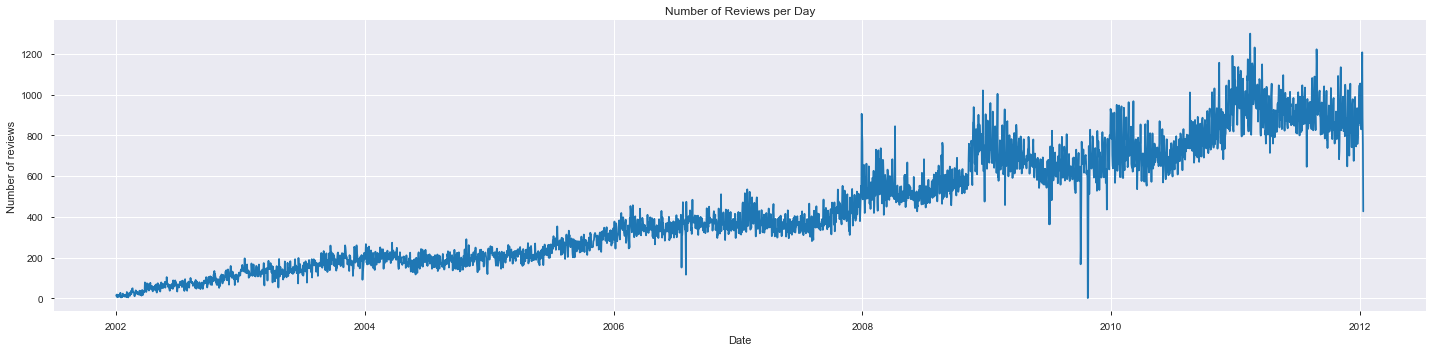

In [14]:
group_by_date = beers_df[ [ 'review_time' ] ].groupby( beers_df[ 'review_time' ].dt.date ).agg( [ 'count' ] )
plt.figure( figsize = ( 20, 5 ) )
plt.plot( group_by_date )
plt.xlabel( 'Date' )
plt.ylabel( 'Number of reviews' )
plt.title( 'Number of Reviews per Day' )
plt.tight_layout()
plt.savefig("Number_of_Reviews_Per_Day.png")
plt.show()

In [15]:
# Count of unique breweries => Integrity issues evidenced => Id is not considered for subsequent analysis
print( 'Unique breweries' )
print( 'By id:', beers_df[ 'brewery_id' ].nunique() )
print( 'By name:', beers_df[ 'brewery_name' ].nunique() )

Unique breweries
By id: 5835
By name: 5737


In [16]:
# Count of unique beers => Integrity issues evidenced => Id is not considered for subsequent analysis
print( 'Unique beers' )
print( 'By id:', beers_df[ 'beer_beerid' ].nunique() )
print( 'By name:', beers_df[ 'beer_name' ].nunique() )

Unique beers
By id: 65915
By name: 56748


In [19]:
# Count of unique users
print( 'Unique users:', beers_df[ 'review_profilename' ].nunique() )
print( 'Unique users with more than 1 review:', beers_df[ 'review_profilename' ].value_counts()[ beers_df[ 'review_profilename' ].value_counts() > 1 ].shape[ 0 ], '-' , str( round( beers_df[ 'review_profilename' ].value_counts()[ beers_df[ 'review_profilename' ].value_counts() > 1 ].shape[ 0 ] / beers_df[ 'review_profilename' ].nunique(), 2 ) * 100 ) + '%' )

Unique users: 33374
Unique users with more than 1 review: 22934 - 69.0%


In [20]:
# Reviews by user
beers_df[ 'review_profilename' ].value_counts().head()

northyorksammy    5817
BuckeyeNation     4661
mikesgroove       4617
Thorpe429         3518
womencantsail     3497
Name: review_profilename, dtype: int64

In [21]:
# A beer subset removing review information is created 
grouped_beers_df = beers_df[ [ 'beer_name', 'brewery_name', 'beer_style', 'beer_abv' ] ].drop_duplicates()

In [22]:
# Count of unique beers in grouped dataset => Integrity issues evidenced with respect to previous analysis => For beer identification, I will use these 4 keys
grouped_beers_df.shape

(65728, 4)

In [23]:
# Count of beers with the same name but different brewery, style or AVB%
grouped_beers_df.loc[ grouped_beers_df.duplicated( subset = [ 'beer_name' ], keep = False ) ].sort_values( by = 'beer_name'  ).shape

(11600, 4)

In [24]:
# Beers by brewery
grouped_beers_df[ 'brewery_name' ].value_counts( dropna = False ).head()

Rock Bottom Restaurant & Brewery      875
John Harvard's Brewery & Ale House    390
Goose Island Beer Co.                 368
Iron Hill Brewery & Restaurant        316
Minneapolis Town Hall Brewery         312
Name: brewery_name, dtype: int64

In [25]:
# Beers by style
grouped_beers_df[ 'beer_style' ].value_counts( dropna = False ).head()

American IPA                3592
American Pale Ale (APA)     3311
American Amber / Red Ale    2496
American Porter             2180
Fruit / Vegetable Beer      1826
Name: beer_style, dtype: int64

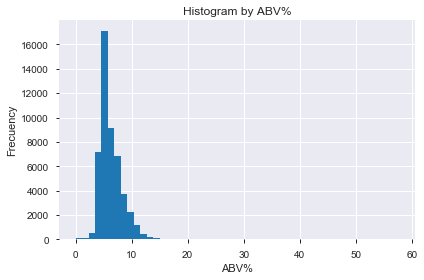

In [27]:
plt.figure()
plt.hist( grouped_beers_df[ 'beer_abv' ], bins = 50 )
plt.xlabel( 'ABV%' )
plt.ylabel( 'Frecuency' )
plt.title( 'Histogram by ABV%' )
#plt.yscale( 'log' )
plt.tight_layout()
plt.savefig("Hist_By_ABV.png")
plt.show()

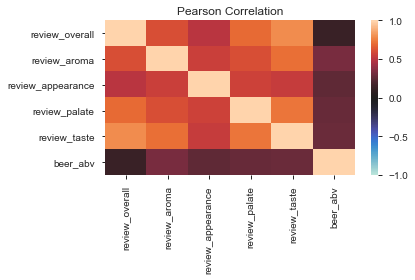

In [29]:
# Pearson correlation
sns.heatmap( beers_df[ [ 'review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv' ] ].corr(), center = 0,  vmin = -1, vmax = 1 )
plt.title( 'Pearson Correlation' )
plt.tight_layout()
plt.savefig("Pearson_Correlation.png")

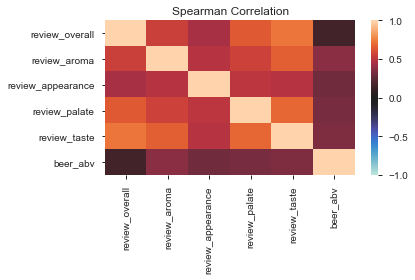

In [31]:
# Spearman correlation
sns.heatmap( beers_df[ [ 'review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv' ] ].corr( method = 'spearman' ), center = 0,  vmin = -1, vmax = 1 )
plt.title( 'Spearman Correlation' )
plt.tight_layout()
plt.savefig("Spearman_Correlation.png")

In [32]:
# An new meassure is created by averaging review by factor
beers_df[ 'review_average' ] = round( ( ( beers_df[ 'review_overall' ] + beers_df[ 'review_aroma' ] + beers_df[ 'review_appearance' ] + beers_df[ 'review_palate' ] + beers_df[ 'review_taste' ] ) / 5 ) * 2 ) / 2

In [33]:
# Groupping by different review factors for visualization purposes
group_by_review_overall = beers_df[ 'review_overall' ].value_counts( dropna = False ).reset_index().rename( columns = { 'index' : 'review', 'review_overall' : 'overall' } ).sort_values( by = 'review' )
group_by_review_aroma = beers_df[ 'review_aroma' ].value_counts( dropna = False ).reset_index().rename( columns = { 'index' : 'review', 'review_aroma' : 'aroma' } ).sort_values( by = 'review' )
group_by_review_appearance = beers_df[ 'review_appearance' ].value_counts( dropna = False ).reset_index().rename( columns = { 'index' : 'review', 'review_appearance' : 'appearance' } ).sort_values( by = 'review' )
group_by_review_palate = beers_df[ 'review_palate' ].value_counts( dropna = False ).reset_index().rename( columns = { 'index' : 'review', 'review_palate' : 'palate' } ).sort_values( by = 'review' )
group_by_review_taste = beers_df[ 'review_taste' ].value_counts( dropna = False ).reset_index().rename( columns = { 'index' : 'review', 'review_taste' : 'taste' } ).sort_values( by = 'review' )
group_by_review_average = beers_df[ 'review_average' ].value_counts( dropna = False ).reset_index().rename( columns = { 'index' : 'review', 'review_average' : 'average' } ).sort_values( by = 'review' )

group_by_review_overall[ 'review' ] = group_by_review_overall[ 'review' ].astype( str )
group_by_review_aroma[ 'review' ] = group_by_review_aroma[ 'review' ].astype( str )
group_by_review_appearance[ 'review' ] = group_by_review_appearance[ 'review' ].astype( str )
group_by_review_palate[ 'review' ] = group_by_review_palate[ 'review' ].astype( str )
group_by_review_taste[ 'review' ] = group_by_review_taste[ 'review' ].astype( str )
group_by_review_average[ 'review' ] = group_by_review_average[ 'review' ].astype( str )

group_by_review = group_by_review_overall.merge( group_by_review_aroma, how = 'outer', on = [ 'review' ] )
group_by_review = group_by_review.merge( group_by_review_appearance, how = 'outer', on = [ 'review' ] )
group_by_review = group_by_review.merge( group_by_review_palate, how = 'outer', on = [ 'review' ] )
group_by_review = group_by_review.merge( group_by_review_taste, how = 'outer', on = [ 'review' ] )
group_by_review = group_by_review.merge( group_by_review_average, how = 'outer', on = [ 'review' ] )
group_by_review = group_by_review.fillna( 0 )

Text(0.5, 0.98, 'Distribution of Reviews by Value')

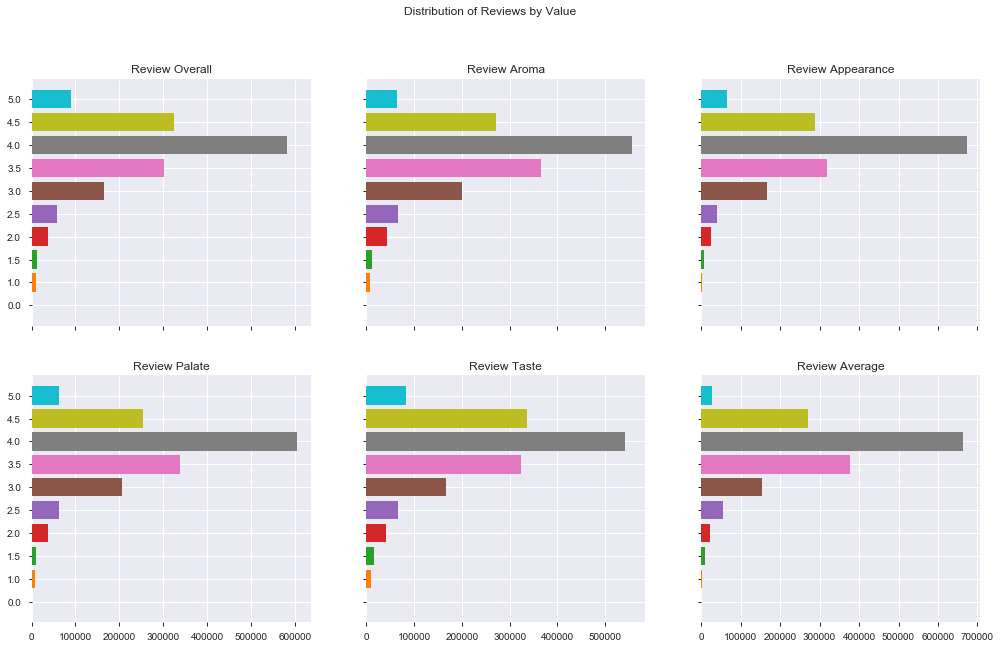

In [34]:
cm = plt.cm.get_cmap( 'tab10' ).colors
f, ( ( ax1, ax2, ax3 ), ( ax4, ax5, ax6 ) ) = plt.subplots( 2, 3, sharex = 'col', sharey = 'row', figsize = ( 17, 10 ) )
ax1.barh( group_by_review[ 'review' ], group_by_review[ 'overall' ], color = cm )
ax1.set_title( 'Review Overall' )
ax2.barh( group_by_review[ 'review' ], group_by_review[ 'aroma' ], color = cm )
ax2.set_title( 'Review Aroma' )
ax3.barh( group_by_review[ 'review' ], group_by_review[ 'appearance' ], color = cm )
ax3.set_title( 'Review Appearance' )
ax4.barh( group_by_review[ 'review' ], group_by_review[ 'palate' ], color = cm )
ax4.set_title( 'Review Palate' )
ax5.barh( group_by_review[ 'review' ], group_by_review[ 'taste' ], color = cm )
ax5.set_title( 'Review Taste' )
ax6.barh( group_by_review[ 'review' ], group_by_review[ 'average' ], color = cm )
ax6.set_title( 'Review Average' )
f.suptitle( 'Distribution of Reviews by Value' )

In [35]:
# This is a python implementarion of the Lower bound of Wilson score confidence interval for a Bernoulli parameter
# Implementation details: http://www.evanmiller.org/how-not-to-sort-by-average-rating.html?fbclid=IwAR2RNIB8geL9V0V9ereqidgRMasdytDOoqlGfCKWOcrRHKsUHFzMb7Xkemw

# pos: number of positive ratings
# n: total number of ratings
def ci_lower_bound( pos, n ):
    if n == 0:
        return 0
    z = 1.96 # For a IC of 0.95
    phat = 1.0 * pos / n
    return ( phat + ( z ** 2 ) / ( 2 * n ) - z * math.sqrt( ( phat * ( 1 - phat ) + ( z ** 2 ) / ( 4 * n ) ) / n ) ) / ( 1 + ( z ** 2 ) / n )

In [36]:
# Aggregation function for reviews
# Positive reviews are defined as a constant fraction of their real value
# Aggregation is performed using the Lower bound of Wilson score confidence interval for a Bernoulli parameter
def agg_reviews( reviews ):
    pos = 0
    for index, review in reviews[ reviews >= 3 ].iteritems():
        pos += review / 5
    #pos = ratings[ ratings >= 3 ].shape[ 0 ]
    return ci_lower_bound( pos, reviews.shape[ 0 ] ) * 5

In [37]:
# Grouping beers and aggregating reviews
grouped_beers_df = beers_df.groupby( [ 'beer_name', 'brewery_name', 'beer_style', 'beer_abv' ] ) \
    .agg( { 'review_overall' : agg_reviews, 'review_aroma' : agg_reviews, 'review_appearance' : agg_reviews, 'review_palate' : agg_reviews, 'review_taste' : agg_reviews, 'review_average' : agg_reviews, 'review_profilename' : 'count' } ).reset_index() \
    .rename( columns = { 'review_profilename' : 'number_of_reviews' } )

In [38]:
# Count of unique beers
grouped_beers_df[ 'beer_name' ].nunique()

44061

In [39]:
# TOP 5 beers by number of reviews
grouped_beers_df.sort_values( by = 'number_of_reviews', ascending = False ).head()

,beer_name,brewery_name,beer_style,beer_abv,review_overall,review_aroma,review_appearance,review_palate,review_taste,review_average,number_of_reviews
731,90 Minute IPA,Dogfish Head Brewery,American Double / Imperial IPA,9.0,4.020191,4.131679,4.121969,4.087696,4.223766,4.133715,3288
31841,Old Rasputin Russian Imperial Stout,North Coast Brewing Co.,Russian Imperial Stout,9.0,4.064484,4.116345,4.311672,4.145139,4.254089,4.188800,3097
39557,Sierra Nevada Celebration Ale,Sierra Nevada Brewing Co.,American IPA,6.8,4.054146,3.988222,4.150608,3.974983,4.080001,4.046394,2986
45123,Two Hearted Ale,"Bell's Brewery, Inc.",American IPA,7.0,4.240870,4.186700,4.071694,4.046744,4.234592,4.168100,2726
41835,Stone Ruination IPA,Stone Brewing Co.,American Double / Imperial IPA,7.7,4.040809,4.264611,4.099740,4.099167,4.257311,4.165487,2702


In [40]:
# Beers with ABV% higher than 30
grouped_beers_df.loc[ grouped_beers_df[ 'beer_abv' ] > 30 ] \
    .sort_values( by = [ 'beer_abv' ], ascending = False )[ [ 'brewery_name', 'beer_name', 'beer_abv' ] ]

,brewery_name,beer_name,beer_abv
38654,Schorschbräu,Schorschbräu Schorschbock 57%,57.70
38653,Schorschbräu,Schorschbräu Schorschbock 43%,43.00
39782,BrewDog,Sink The Bismarck!,41.00
38652,Schorschbräu,Schorschbräu Schorschbock 40%,39.44
5796,De Struise Brouwers,Black Damnation VI - Messy,39.00
42915,BrewDog,Tactical Nuclear Penguin,32.00
38651,Schorschbräu,Schorschbräu Schorschbock 31%,30.86


In [ ]:
## If you had to pick 3 beers to recommend using only this data, which would you pick?
## Reviews after grouping are in function of individual reviews given by each user 
## and number of reviews for that beer. Beers with many high individual ratings likely 
## will have a high grouped review.

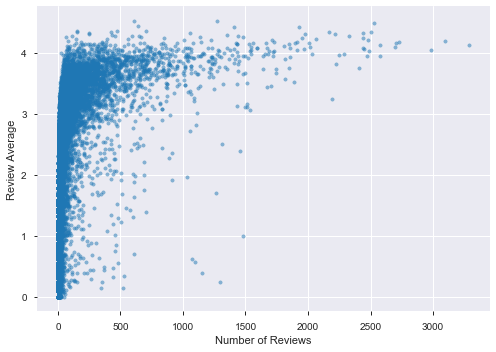

In [42]:
plt.figure( figsize = ( 7, 5 ) )
plt.scatter( grouped_beers_df[ 'number_of_reviews' ], grouped_beers_df[ 'review_average' ], marker ='.', alpha = .5 )
plt.xlabel( 'Number of Reviews' )
plt.ylabel( 'Review Average' )
plt.tight_layout()
plt.savefig("#ofReviews_ReviewAverage.png")
plt.show()

In [43]:
grouped_beers_df.sort_values( by = 'review_average', ascending = False ).head( 3 )

,beer_name,brewery_name,beer_style,beer_abv,review_overall,review_aroma,review_appearance,review_palate,review_taste,review_average,number_of_reviews
44523,Trappist Westvleteren 12,Brouwerij Westvleteren (Sint-Sixtusabdij van W...,Quadrupel (Quad),10.2,4.530716,4.495034,4.354817,4.539659,4.646554,4.524758,1272
34257,Pliny The Younger,Russian River Brewing Company,American Double / Imperial IPA,11.0,4.474180,4.618422,4.349282,4.492465,4.615607,4.523674,610
34256,Pliny The Elder,Russian River Brewing Company,American Double / Imperial IPA,8.0,4.525157,4.555939,4.317931,4.380363,4.569367,4.478398,2527


In [44]:
# Which of the factors (aroma, taste, appearance, palate) are most important 
# in determining the overall quality of a beer?
# In terms of correlation (pearson or spearman), the ranking seems to be: 
# taste, palate, aroma and appearance.

# A most sofisticated perspective can be training a linear regression model.

In [45]:
# Defining the linear model
linear_model = LinearRegression( normalize = True )

In [46]:
# Training and generating predictions for the model
linear_model.fit( X = beers_df[ [ 'review_aroma', 'review_appearance', 'review_palate', 'review_taste' ] ], y = beers_df[ 'review_overall' ] )
preds = linear_model.predict( beers_df[ [ 'review_aroma', 'review_appearance', 'review_palate', 'review_taste' ] ] )

In [47]:
# Validating the error in the model
# Apparently, a linear model is enough to represent the phenomenon evidencing a global error of 0.42 when the range of possible values for the target is betwenn 0 and 5
# Most sophisitcated validation schemas must be developed
np.sqrt( mean_squared_error( beers_df[ 'review_overall' ], preds ) )

0.42136593232122693

In [48]:
grouped_beers_df.sort_values( by = [ 'review_aroma', 'review_appearance' ], ascending = False ).head( 10 ) \
    [ 'beer_style' ].unique().tolist()

['American Double / Imperial IPA',
 'American Double / Imperial Stout',
 'Quadrupel (Quad)',
 'Russian Imperial Stout']